In [4]:
import os

# Check if the files are now in the current directory
print("Files in current directory:")
files = os.listdir()
split_files = [f for f in files if f.startswith(('X_', 'Y_', 'x_', 'y_'))]

if split_files:
    print("✓ Split files found:")
    for f in split_files:
        print(f"  - {f}")
else:
    print("❌ No split files found yet")

Files in current directory:
✓ Split files found:
  - X_test.csv
  - X_train.csv
  - Y_test.csv
  - Y_train.csv


In [5]:
import pandas as pd
import numpy as np

# Load the CSV files
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('Y_train.csv')
y_test = pd.read_csv('Y_test.csv')

# Convert y_train and y_test to Series if they're DataFrames
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()

print("✓ Data loaded successfully!")
print("\nDataset shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nColumn names:")
print(X_train.columns.tolist())

print("\nTarget variable distribution:")
print(y_train.value_counts())
print("\nPercentage distribution:")
print(y_train.value_counts(normalize=True) * 100)

print("\nMissing values in X_train:")
print(X_train.isnull().sum().sum())

✓ Data loaded successfully!

Dataset shapes:
X_train: (1013, 17)
X_test: (254, 17)
y_train: (1013,)
y_test: (254,)

First few rows of X_train:
      Group       Sex       Age  Patients number per hour  Arrival mode  \
0 -0.917371 -1.044394  0.992845                  0.152141      0.221851   
1 -0.917371 -1.044394 -0.985119                  0.468666      0.221851   
2  1.090071  0.957493  1.195713                  0.152141     -2.254668   
3 -0.917371  0.957493 -0.224364                  0.468666      0.221851   
4 -0.917371  0.957493 -1.238704                  0.785190      0.221851   

     Injury  Chief_complain    Mental      Pain  NRS_pain       SBP       DBP  \
0 -0.488379        1.345492 -0.236291  0.880062 -0.518282 -1.612977 -0.397344   
1 -0.488379        0.283825 -0.236291 -1.136283 -0.518282 -0.394448 -0.466918   
2 -0.488379       -0.903312 -0.236291  0.880062  1.991258 -0.889475 -1.371375   
3  2.047590        1.702599 -0.236291 -1.136283 -0.518282  0.671765  0.924555   
4

In [9]:
# Check the unique values in y_train
print("Unique values in y_train:")
print(sorted(y_train.unique()))
print(f"\nNumber of unique values: {y_train.nunique()}")

# Check data type
print(f"Data type: {y_train.dtype}")

Unique values in y_train:
[np.float64(-2.638789718496863), np.float64(-1.5088990211884732), np.float64(-0.3790083238800834), np.float64(0.7508823734283062), np.float64(1.880773070736696)]

Number of unique values: 5
Data type: float64


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encode the continuous values to class labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Mapping of original values to class labels:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"  {original:.4f} -> Class {encoded}")

print(f"\ny_train_encoded shape: {y_train_encoded.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")

print("\nEncoded class distribution:")
unique, counts = np.unique(y_train_encoded, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Class {cls}: {count} samples ({count/len(y_train_encoded)*100:.1f}%)")

Mapping of original values to class labels:
  -2.6388 -> Class 0
  -1.5089 -> Class 1
  -0.3790 -> Class 2
  0.7509 -> Class 3
  1.8808 -> Class 4

y_train_encoded shape: (1013,)
y_test_encoded shape: (254,)

Encoded class distribution:
  Class 0: 13 samples (1.3%)
  Class 1: 167 samples (16.5%)
  Class 2: 365 samples (36.0%)
  Class 3: 409 samples (40.4%)
  Class 4: 59 samples (5.8%)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
import matplotlib.pyplot as plt

# Initialize Random Forest with class balancing
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    max_depth=15,               # Maximum depth of trees
    min_samples_split=5,        # Minimum samples to split
    min_samples_leaf=2,         # Minimum samples at leaf
    class_weight='balanced',    # Handle class imbalance - IMPORTANT!
    random_state=42,
    n_jobs=-1                   # Use all CPU cores
)

# Train the model
print("Training Random Forest...")
rf_model.fit(X_train, y_train_encoded)
print("✓ Training complete!")

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

# Evaluate
print("\n" + "="*50)
print("RANDOM FOREST RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_rf):.4f}")
print(f"Recall (macro avg): {recall_score(y_test_encoded, y_pred_rf, average='macro'):.4f}")
print(f"Recall (weighted avg): {recall_score(y_test_encoded, y_pred_rf, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_rf, target_names=['Class 0 (Critical)', 'Class 1 (High)', 'Class 2 (Medium)', 'Class 3 (Low)', 'Class 4']))

print("\nPer-Class Recall (Important for healthcare!):")
cm = confusion_matrix(y_test_encoded, y_pred_rf)
for i in range(5):
    class_recall = cm[i, i] / cm[i, :].sum() if cm[i, :].sum() > 0 else 0
    print(f"  Class {i}: {class_recall:.4f}")

Training Random Forest...
✓ Training complete!

RANDOM FOREST RESULTS
Accuracy: 0.5512
Recall (macro avg): 0.5137
Recall (weighted avg): 0.5512

Classification Report:
                    precision    recall  f1-score   support

Class 0 (Critical)       0.80      0.80      0.80         5
    Class 1 (High)       0.64      0.34      0.44        47
  Class 2 (Medium)       0.50      0.68      0.58        82
     Class 3 (Low)       0.56      0.67      0.61        92
           Class 4       1.00      0.07      0.13        28

          accuracy                           0.55       254
         macro avg       0.70      0.51      0.51       254
      weighted avg       0.61      0.55      0.52       254


Per-Class Recall (Important for healthcare!):
  Class 0: 0.8000
  Class 1: 0.3404
  Class 2: 0.6829
  Class 3: 0.6739
  Class 4: 0.0714


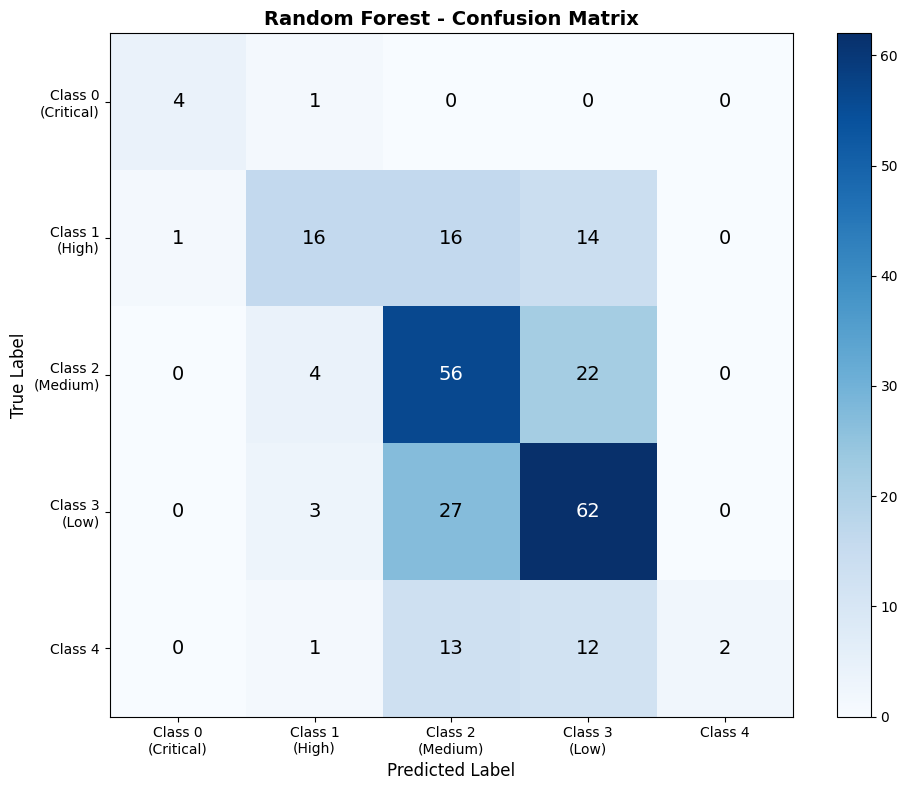


Confusion Matrix Analysis:
Diagonal values (correct predictions): [ 4 16 56 62  2]
Total per class: [ 5 47 82 92 28]


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_rf)

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(cm, cmap='Blues')

# Add labels
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_xticklabels(['Class 0\n(Critical)', 'Class 1\n(High)', 'Class 2\n(Medium)', 'Class 3\n(Low)', 'Class 4'])
ax.set_yticklabels(['Class 0\n(Critical)', 'Class 1\n(High)', 'Class 2\n(Medium)', 'Class 3\n(Low)', 'Class 4'])

# Add text annotations
for i in range(5):
    for j in range(5):
        text = ax.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black", fontsize=14)

ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
print("Diagonal values (correct predictions):", np.diag(cm))
print("Total per class:", cm.sum(axis=1))


FEATURE IMPORTANCE
                     feature  importance
6             Chief_complain    0.130189
2                        Age    0.105317
7                     Mental    0.097076
16               Shock_Index    0.090056
12                        HR    0.072810
10                       SBP    0.072727
3   Patients number per hour    0.060913
11                       DBP    0.060613
14                        BT    0.059278
4               Arrival mode    0.054146
9                   NRS_pain    0.041559
15                Saturation    0.031517
13                        RR    0.029551
5                     Injury    0.027905
8                       Pain    0.024535
0                      Group    0.023469
1                        Sex    0.018341


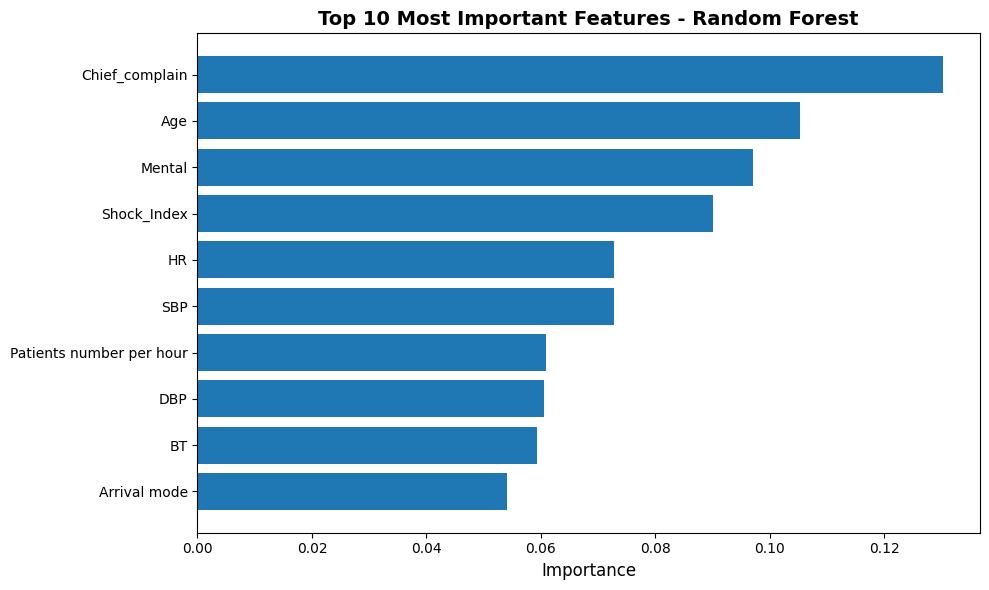

In [13]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "="*50)
print("FEATURE IMPORTANCE")
print("="*50)
print(feature_importance)

# Visualize top 10
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['feature'], feature_importance.head(10)['importance'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,              # Maximum depth of the tree
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples at leaf node
    class_weight='balanced',   # Handle class imbalance
    random_state=42
)

# Train the model
print("Training Decision Tree...")
dt_model.fit(X_train, y_train_encoded)
print("✓ Decision Tree training complete!")

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)

# Evaluate
print("\n" + "="*50)
print("DECISION TREE RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_dt):.4f} ({accuracy_score(y_test_encoded, y_pred_dt)*100:.2f}%)")
print(f"Recall (macro avg): {recall_score(y_test_encoded, y_pred_dt, average='macro'):.4f}")
print(f"Recall (weighted avg): {recall_score(y_test_encoded, y_pred_dt, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_dt, target_names=['Class 0 (Critical)', 'Class 1 (High)', 'Class 2 (Medium)', 'Class 3 (Low)', 'Class 4']))

print("\nPer-Class Recall (Important for healthcare!):")
cm_dt = confusion_matrix(y_test_encoded, y_pred_dt)
for i in range(5):
    class_recall = cm_dt[i, i] / cm_dt[i, :].sum() if cm_dt[i, :].sum() > 0 else 0
    class_precision = cm_dt[i, i] / cm_dt[:, i].sum() if cm_dt[:, i].sum() > 0 else 0
    print(f"  Class {i}: Recall={class_recall:.4f}, Precision={class_precision:.4f}")

Training Decision Tree...
✓ Decision Tree training complete!

DECISION TREE RESULTS
Accuracy: 0.4370 (43.70%)
Recall (macro avg): 0.4728
Recall (weighted avg): 0.4370

Classification Report:
                    precision    recall  f1-score   support

Class 0 (Critical)       0.80      0.80      0.80         5
    Class 1 (High)       0.50      0.51      0.51        47
  Class 2 (Medium)       0.50      0.48      0.49        82
     Class 3 (Low)       0.51      0.43      0.47        92
           Class 4       0.09      0.14      0.11        28

          accuracy                           0.44       254
         macro avg       0.48      0.47      0.47       254
      weighted avg       0.47      0.44      0.45       254


Per-Class Recall (Important for healthcare!):
  Class 0: Recall=0.8000, Precision=0.8000
  Class 1: Recall=0.5106, Precision=0.5000
  Class 2: Recall=0.4756, Precision=0.5000
  Class 3: Recall=0.4348, Precision=0.5128
  Class 4: Recall=0.1429, Precision=0.0889


In [18]:
# Install if needed
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

# Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_encoded)

# Train
print("Training XGBoost...")
xgb_model.fit(X_train, y_train_encoded, sample_weight=sample_weights)
print("✓ XGBoost training complete!")

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("\n" + "="*50)
print("XGBOOST RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb):.4f} ({accuracy_score(y_test_encoded, y_pred_xgb)*100:.2f}%)")
print(f"Recall (macro avg): {recall_score(y_test_encoded, y_pred_xgb, average='macro'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=['Class 0 (Critical)', 'Class 1 (High)', 'Class 2 (Medium)', 'Class 3 (Low)', 'Class 4']))

print("\nPer-Class Recall:")
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
for i in range(5):
    class_recall = cm_xgb[i, i] / cm_xgb[i, :].sum() if cm_xgb[i, :].sum() > 0 else 0
    print(f"  Class {i}: {class_recall:.4f}")

Training XGBoost...
✓ XGBoost training complete!

XGBOOST RESULTS
Accuracy: 0.5709 (57.09%)
Recall (macro avg): 0.5426

Classification Report:
                    precision    recall  f1-score   support

Class 0 (Critical)       0.80      0.80      0.80         5
    Class 1 (High)       0.58      0.38      0.46        47
  Class 2 (Medium)       0.55      0.63      0.59        82
     Class 3 (Low)       0.58      0.72      0.64        92
           Class 4       0.50      0.18      0.26        28

          accuracy                           0.57       254
         macro avg       0.60      0.54      0.55       254
      weighted avg       0.57      0.57      0.55       254


Per-Class Recall:
  Class 0: 0.8000
  Class 1: 0.3830
  Class 2: 0.6341
  Class 3: 0.7174
  Class 4: 0.1786


In [17]:
!pip install xgboost

In [21]:
# Install first
# !pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train_encoded)

print(f"Original training size: {X_train.shape[0]}")
print(f"Balanced training size: {X_train_balanced.shape[0]}")
print("\nBalanced class distribution:")
print(pd.Series(y_train_balanced).value_counts().sort_index())

# Train Random Forest on balanced data
rf_balanced = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = rf_balanced.predict(X_test)

print("\nRANDOM FOREST WITH SMOTE RESULTS")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_balanced):.4f}")
print(f"Recall (macro avg): {recall_score(y_test_encoded, y_pred_balanced, average='macro'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_balanced))

Original training size: 1013
Balanced training size: 2045

Balanced class distribution:
0    409
1    409
2    409
3    409
4    409
Name: count, dtype: int64

RANDOM FOREST WITH SMOTE RESULTS
Accuracy: 0.5984
Recall (macro avg): 0.5625

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.69      0.47      0.56        47
           2       0.55      0.70      0.61        82
           3       0.62      0.71      0.66        92
           4       0.50      0.14      0.22        28

    accuracy                           0.60       254
   macro avg       0.63      0.56      0.57       254
weighted avg       0.60      0.60      0.58       254



In [20]:
!pip install imbalanced-learn


   ---------------------------------------- 0/2 [sklearn-compat]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   -------------------- ------------------- 1/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imbalanced-learn]



In [22]:
import pickle
import joblib  # joblib is better for scikit-learn models

# Method 1: Using joblib (Recommended for sklearn models)
print("Saving models using joblib...")

# Save Random Forest
joblib.dump(rf_model, 'random_forest_model.pkl')
print("✓ Random Forest saved as 'random_forest_model.pkl'")

# Save Decision Tree
joblib.dump(dt_model, 'decision_tree_model.pkl')
print("✓ Decision Tree saved as 'decision_tree_model.pkl'")

# Save XGBoost (if you trained it)
try:
    joblib.dump(xgb_model, 'xgboost_model.pkl')
    print("✓ XGBoost saved as 'xgboost_model.pkl'")
except:
    print("⚠ XGBoost not found, skipping")

# Save LightGBM (if you trained it)
try:
    joblib.dump(lgbm_model, 'lightgbm_model.pkl')
    print("✓ LightGBM saved as 'lightgbm_model.pkl'")
except:
    print("⚠ LightGBM not found, skipping")

# Save CatBoost (if you trained it)
try:
    joblib.dump(catboost_model, 'catboost_model.pkl')
    print("✓ CatBoost saved as 'catboost_model.pkl'")
except:
    print("⚠ CatBoost not found, skipping")

# Save the Label Encoder (IMPORTANT!)
joblib.dump(le, 'label_encoder.pkl')
print("✓ Label Encoder saved as 'label_encoder.pkl'")

print("\n✓ All models saved successfully!")

Saving models using joblib...
✓ Random Forest saved as 'random_forest_model.pkl'
✓ Decision Tree saved as 'decision_tree_model.pkl'
✓ XGBoost saved as 'xgboost_model.pkl'
⚠ LightGBM not found, skipping
⚠ CatBoost not found, skipping
✓ Label Encoder saved as 'label_encoder.pkl'

✓ All models saved successfully!
